In [1]:
# install pandas and parquet
!pip install pandas
!pip install parquet
!pip install pyarrow

Opis kolona:

- datum_dolaska - datum kada bi gost trebao stići u hotel
- datum_kreiranja_rezervacije - datum kada je rezervacija kreirana
- datum_odjave - datum kada je gost napustio hotel
- datum_otkazivanja_rezervacije - datum kada je rezervacija otkazana
- broj_odraslih_gostiju - broj odraslih koji će boraviti u rezerviranim sobama
- broj_djece_gostiju - broj djece koji će boraviti u rezerviranim sobama
- zemlja_gosta - zemlja iz koje gost dolazi. Kategorije su zapisane u ISO 3155–3:2013 formatu
- kanal_prodaje_id - id kanala prodaje preko kojeg je rezervacija napravljena (primjeri: direktna rezervacija, agencija, online)
- tip_sobe_id - id tipa sobe koju je gost rezervirao
- cijena_nocenja - cijena jednog noćenja za pojedinu rezeraciju
- status_rezervacije - status rezervacije (Check-Out, Canceled, No-Show)
- rezervacija_id - id rezervacije
- gost_id - id gosta

In [42]:
import pandas as pd
import numpy as np

In [2]:
dataset_path = '../data/raw/export_df.parquet'

In [3]:
df = pd.read_parquet(dataset_path)
df.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       119210 non-null  int32         
 1   datum_dolaska                  119210 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    119210 non-null  datetime64[ns]
 3   datum_odjave                   119210 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  44199 non-null   object        
 5   broj_odraslih_gostiju          119210 non-null  int64         
 6   broj_djece_gostiju             119210 non-null  float64       
 7   zemlja_gosta                   119210 non-null  object        
 8   kanal_prodaje_id               119210 non-null  int32         
 9   tip_sobe_id                    119210 non-null  int32         
 10  cijena_nocenja                 119210 non-null  float64       
 11  

In [5]:
df.describe()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id
count,119210.000000,119210,119210,119210,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,1.192100e+05,1.192100e+05
mean,0.664063,2016-09-18 04:45:19.825518080,2016-06-06 09:30:00.513379584,2016-09-21 14:59:07.635265792,1.859206,0.112004,1.702357,1.503179,123.182994,1.372828e+06,1.053647e+06
min,0.000000,2015-01-01 00:00:00,2013-06-25 00:00:00,2015-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,40.003037,1.313223e+06,1.000000e+06
25%,0.000000,2016-02-29 00:00:00,2015-11-30 00:00:00,2016-03-03 00:00:00,2.000000,0.000000,2.000000,1.000000,80.917473,1.343025e+06,1.026866e+06
50%,1.000000,2016-10-08 00:00:00,2016-06-24 00:00:00,2016-10-11 00:00:00,2.000000,0.000000,2.000000,1.000000,109.455175,1.372828e+06,1.053626e+06
75%,1.000000,2017-03-15 00:00:00,2016-12-27 00:00:00,2017-03-19 00:00:00,2.000000,0.000000,2.000000,2.000000,146.425535,1.402630e+06,1.080427e+06
max,1.000000,2017-12-31 00:00:00,2017-12-31 00:00:00,2018-01-14 00:00:00,55.000000,10.000000,4.000000,8.000000,7351.295691,1.432432e+06,1.107288e+06
std,0.472319,NaN,NaN,NaN,0.575186,0.412849,0.681164,1.125512,65.494762,3.441311e+04,3.095049e+04


In [6]:
hotel_id_unique = df['hotel_id'].unique()
print(hotel_id_unique)

[0 1]


In [7]:
hotel_zero = df[df['hotel_id'] == 0]
hotel_one = df[df['hotel_id'] == 1]

assert (len(hotel_zero)+ len(hotel_one)) == len(df)

In [8]:
print(f"Prvi hotel ima {len(hotel_zero)/len(df)*100} % svih zapisa ")
print(f"Prvi hotel ima {len(hotel_one)/len(df)*100} % svih zapisa ")



Prvi hotel ima 33.5936582501468 % svih zapisa 
Prvi hotel ima 66.4063417498532 % svih zapisa 


In [9]:
print(hotel_zero['zemlja_gosta'].value_counts()[0:25])

zemlja_gosta
PRT    17790
GBR     6754
ESP     3937
IRL     2163
FRA     1591
DEU     1217
CN       693
NLD      507
USA      473
0        464
ITA      447
BEL      442
CHE      433
BRA      422
POL      328
SWE      301
AUT      210
RUS      193
ROU      176
FIN      150
CHN      133
NOR      119
AUS       86
LUX       78
MAR       76
Name: count, dtype: int64


In [10]:
print(hotel_one['zemlja_gosta'].value_counts()[0:25])

zemlja_gosta
PRT    32096
FRA     8220
GBR     5738
DEU     5578
ESP     4788
ITA     3120
BEL     1762
BRA     1701
USA     1525
NLD     1525
IRL     1391
CHE     1236
AUT     1000
CHN      820
SWE      686
CN       610
ISR      605
POL      566
NOR      459
RUS      428
DNK      344
AGO      336
AUS      313
ROU      309
FIN      273
Name: count, dtype: int64


In [11]:
croats = df[df['zemlja_gosta'] == 'HRV']
zeros = df[df['zemlja_gosta'] == '0']

print(f"Imamo {len(croats)} Hrvata i {len(zeros)} gosta s nepoznatom zemljom dolaska")


Imamo 94 Hrvata i 552 nepoznatih zemalja gosta


In [12]:
df_copy = df
df_copy['datum_dolaska'] = pd.to_datetime(df_copy['datum_dolaska'])


df_copy['duljina_boravka'] = df_copy['datum_odjave'] - df_copy['datum_dolaska']
df_copy['duljina_boravka'] = df_copy['duljina_boravka'].dt.days



In [13]:
print(df_copy['duljina_boravka'].head(10)) #Rezervacija nije otkazana, a gosti su došli i otišli isti dan?

0    0
1    0
2    1
3    1
4    2
5    2
6    2
7    2
8    3
9    3
Name: duljina_boravka, dtype: int64


In [14]:
min_date = df_copy['datum_dolaska'].min()
max_date = df_copy['datum_dolaska'].max()

print(f"Looking at period form {min_date} to {max_date}")

Looking at period form 2015-01-01 00:00:00 to 2017-12-31 00:00:00


In [15]:
df_2015 = df_copy[df_copy['datum_dolaska'].dt.year == 2015]
df_2016 = df_copy[df_copy['datum_dolaska'].dt.year == 2016]
df_2017 = df_copy[df_copy['datum_dolaska'].dt.year == 2017]


assert len(df_2015) + len(df_2016) + len(df_2017) == len(df_copy)


In [16]:
print(f"U 2015 ima {len(df_2015[df_2015['zemlja_gosta']=='PRT'])} Portugalaca")
print(f"U 2016 ima {len(df_2016[df_2016['zemlja_gosta']=='PRT'])} Portugalaca")
print(f"U 2017 ima {len(df_2017[df_2017['zemlja_gosta']=='PRT'])} Portugalaca")


U 2015 ima 13043 Portugalaca
U 2016 ima 23023 Portugalaca
U 2017 ima 13820 Portugalaca


In [17]:
print(f"U 2015 Portugalci ostvarili {df_2015[(df_2015['zemlja_gosta'] == 'PRT') & df_2015['datum_otkazivanja_rezervacije'].notna()]['duljina_boravka'].sum()} noćenja")
print(f"U 2016 Portugalci ostvarili {df_2016[(df_2016['zemlja_gosta'] == 'PRT') & df_2016['datum_otkazivanja_rezervacije'].notna()]['duljina_boravka'].sum()} noćenja")
print(f"U 2017 Portugalci ostvarili {df_2017[(df_2017['zemlja_gosta'] == 'PRT') & df_2017['datum_otkazivanja_rezervacije'].notna()]['duljina_boravka'].sum()} noćenja")



U 2015 Portugalci ostvarili 23090 noćenja
U 2016 Portugalci ostvarili 39118 noćenja
U 2017 Portugalci ostvarili 25618 noćenja


##### Generalno te po nacionalosti, na koji se dan najviše kreira rezervacija.
##### Povezivanje i s blagdanima po nekim nacijama (državni te lokalni blagdani uzeti u obzir)
##### Gledamo stupce :  datum_kreiranja_rezervacije,datum_dolaska,datum_odjave,datum_otkazivanja_rezervacije,

In [18]:
from datetime import datetime

In [19]:
df_copy['dan_rezervacije'] = df_copy['datum_kreiranja_rezervacije'].dt.strftime('%A')
df_copy['dan_dolaska'] = df_copy['datum_dolaska'].dt.strftime('%A')
df_copy['dan_odjave'] = df_copy['datum_odjave'].dt.strftime('%A')
df_copy['dan_otkazivanja'] = df_copy['datum_otkazivanja_rezervacije'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%A') if pd.notna(x) else None)


In [20]:
df_copy.head(10)

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,duljina_boravka,dan_rezervacije,dan_dolaska,dan_odjave,dan_otkazivanja
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,0,Wednesday,Wednesday,Wednesday,None
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,0,Wednesday,Wednesday,Wednesday,None
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1,Wednesday,Wednesday,Thursday,None
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1,Friday,Wednesday,Thursday,None
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2,Sunday,Wednesday,Friday,None
5,0,2015-07-01,2015-04-21,2015-07-03,None,2,0.0,GBR,2,1,143.304560,Check-Out,1313228,1044263,2,Tuesday,Wednesday,Friday,None
6,0,2015-07-01,2015-06-25,2015-07-03,None,2,0.0,PRT,0,0,161.502814,Check-Out,1313229,1022260,2,Thursday,Wednesday,Friday,None
7,0,2015-07-01,2014-09-15,2015-07-03,None,2,0.0,PRT,0,0,151.176542,Check-Out,1313230,1101557,2,Monday,Wednesday,Friday,None
8,0,2015-07-01,2015-06-30,2015-07-04,2015-05-06,2,0.0,PRT,2,1,61.437192,Canceled,1313231,1075633,3,Tuesday,Wednesday,Saturday,Wednesday
9,0,2015-07-01,2015-06-28,2015-07-04,2015-04-22,2,0.0,PRT,2,2,150.365262,Canceled,1313232,1056139,3,Sunday,Wednesday,Saturday,Wednesday


### Vizuali

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_copy['is_cancellation'] = df_copy['datum_otkazivanja_rezervacije'].notna()

grouped_hotel = df_copy.groupby('hotel_id').agg({'is_cancellation': ['sum', 'count']})
grouped_hotel.columns = ['cancellations', 'total_bookings']
grouped_hotel['cancellation_percentage'] = (grouped_hotel['cancellations'] / grouped_hotel['total_bookings']) * 100

grouped_nationality = df_copy.groupby('zemlja_gosta').agg({'is_cancellation': ['sum', 'count']})
grouped_nationality.columns = ['cancellations', 'total_bookings']
grouped_nationality['cancellation_percentage'] = (grouped_nationality['cancellations'] / grouped_nationality['total_bookings']) * 100

grouped_channel = df_copy.groupby('kanal_prodaje_id').agg({'is_cancellation': ['sum', 'count']})
grouped_channel.columns = ['cancellations', 'total_bookings']
grouped_channel['cancellation_percentage'] = (grouped_channel['cancellations'] / grouped_channel['total_bookings']) * 100

In [23]:
df_copy['is_cancellation'] = df_copy['datum_otkazivanja_rezervacije'].notna()
print(len(df_copy[df_copy['is_cancellation'] == True]))
print(len(df_copy[df_copy['is_cancellation'] == False]))

44199
75011


In [24]:
print(grouped_nationality['cancellation_percentage'])


zemlja_gosta
0       17.028986
ABW      0.000000
AGO     55.710306
ALB     27.272727
AND     71.428571
          ...    
VGB    100.000000
VNM     25.000000
ZAF     38.961039
ZMB     50.000000
ZWE     60.000000
Name: cancellation_percentage, Length: 173, dtype: float64


In [25]:
print(grouped_nationality['cancellations'])

zemlja_gosta
0       94
ABW      0
AGO    200
ALB      3
AND      5
      ... 
VGB      1
VNM      2
ZAF     30
ZMB      1
ZWE      3
Name: cancellations, Length: 173, dtype: int64


In [26]:
print(grouped_hotel['cancellation_percentage'])
print(grouped_hotel['cancellations'])

hotel_id
0    27.767373
1    41.785935
Name: cancellation_percentage, dtype: float64
hotel_id
0    11120
1    33079
Name: cancellations, dtype: int64


In [27]:
print(grouped_channel['cancellation_percentage'])
print(grouped_channel['cancellations'])

kanal_prodaje_id
0    17.486825
1    22.056834
2    41.059847
3    80.000000
4    19.170984
Name: cancellation_percentage, dtype: float64
kanal_prodaje_id
0     2555
1     1467
2    40136
3        4
4       37
Name: cancellations, dtype: int64


In [29]:
hotel_one = df_copy[df_copy['hotel_id'] == 0]
hotel_two = df_copy[df_copy['hotel_id'] == 1]
assert(len(hotel_one) + len(hotel_two) == len(df_copy))

In [43]:
mean_price_hotel_one, mean_price_hotel_two  =np.mean(hotel_one['cijena_nocenja']), np.mean(hotel_two['cijena_nocenja'])
std_price_hotel_one, std_price_hotel_two  =np.std(hotel_one['cijena_nocenja']), np.std(hotel_two['cijena_nocenja'])


In [56]:
q11 = np.percentile(hotel_one['cijena_nocenja'], 25)
q31 = np.percentile(hotel_one['cijena_nocenja'], 75)
iqr1 = q31 - q11
threshold1 = 1.5 * iqr1
outliers1 = np.where((hotel_one['cijena_nocenja'] < q11 - threshold1) | (hotel_one['cijena_nocenja'] > q31 + threshold1))
 
print(len(outliers1[0])/len(hotel_one['cijena_nocenja'])*100)


7.081679027143107


In [55]:
q12 = np.percentile(hotel_two['cijena_nocenja'], 25)
q32 = np.percentile(hotel_two['cijena_nocenja'], 75)
iqr2 = q31 - q12
threshold2 = 1.5 * iqr2
outliers2 = np.where((hotel_two['cijena_nocenja'] < q12 - threshold2) | (hotel_two['cijena_nocenja'] > q32 + threshold2))
 
print(len(outliers2[0])/len(hotel_two['cijena_nocenja'])*100)


3.0456147442618398


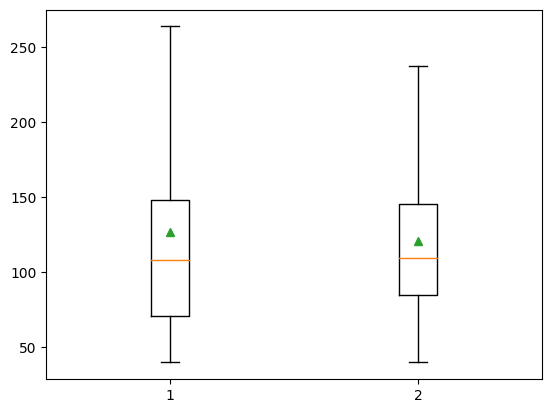

In [58]:
dict = plt.boxplot([hotel_one['cijena_nocenja'], hotel_two['cijena_nocenja']], showfliers=False,showmeans=True)

In [72]:
print(f"Korelacija cijene i tipa sobe u hotelu 1 : {hotel_one['tip_sobe_id'].corr(hotel_one['cijena_nocenja'])}") 
print(f"Korelacija cijene i tipa sobe u hotelu 2 : {hotel_two['tip_sobe_id'].corr(hotel_two['cijena_nocenja'])}") 


Korelacija cijene i tipa sobe u hotelu 1 : 0.2667099803772009
Korelacija cijene i tipa sobe u hotelu 2 : 0.25234461296429495


In [ ]:
hotel_one['datum_dolaska'] = pd.to_datetime(hotel_one['datum_dolaska'])
hotel_one['datum_dolaska'] = pd.to_numeric(hotel_one['datum_dolaska'])
hotel_two['datum_dolaska'] = pd.to_datetime(hotel_two['datum_dolaska'])
hotel_two['datum_dolaska'] = pd.to_numeric(hotel_two['datum_dolaska'])

print(f"Korelacija datuma dolaska i cijene prvog hotela  {hotel_one['datum_dolaska'].corr(hotel_one['cijena_nocenja'])}")
print(f"Korelacija datuma dolaska i cijene drugog hotela  {hotel_two['datum_dolaska'].corr(hotel_two['cijena_nocenja'])}")


In [74]:
krivi_datumi = df_copy[df_copy['datum_otkazivanja_rezervacije'] > df_copy['datum_dolaska']]

In [76]:
print(len(krivi_datumi))
krivi_datumi.head(10)

1953


,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,duljina_boravka,dan_rezervacije,dan_dolaska,dan_odjave,dan_otkazivanja,is_cancellation
40048,1,2015-01-01,2015-01-01,2015-01-05,2015-07-01,2,0.0,PRT,2,1,97.930547,Canceled,1353271,1048285,4,Thursday,Thursday,Monday,Wednesday,True
40054,1,2015-05-02,2015-01-17,2015-05-06,2015-06-25,1,0.0,PRT,2,1,72.739914,Canceled,1353277,1019190,4,Saturday,Saturday,Wednesday,Thursday,True
40055,1,2015-05-02,2015-03-28,2015-05-07,2015-07-02,2,0.0,PRT,2,1,81.380511,No-Show,1353278,1001102,5,Saturday,Saturday,Thursday,Thursday,True
40075,1,2015-05-04,2014-02-11,2015-05-07,2015-06-15,2,0.0,PRT,2,1,63.579685,Canceled,1353298,1075782,3,Tuesday,Monday,Thursday,Monday,True
40077,1,2015-05-05,2015-04-28,2015-05-08,2015-06-30,2,0.0,PRT,2,1,57.883570,Canceled,1353300,1059430,3,Tuesday,Tuesday,Friday,Tuesday,True
40079,1,2015-05-05,2014-07-31,2015-05-10,2015-07-03,2,0.0,PRT,2,1,43.009479,Canceled,1353302,1032621,5,Thursday,Tuesday,Sunday,Friday,True
40092,1,2015-05-07,2014-10-05,2015-05-10,2015-06-17,2,0.0,PRT,2,1,84.786445,Canceled,1353315,1016125,3,Sunday,Thursday,Sunday,Wednesday,True
40095,1,2015-05-07,2014-11-14,2015-05-11,2015-06-29,2,0.0,PRT,2,1,72.174607,Canceled,1353318,1080770,4,Friday,Thursday,Monday,Monday,True
40099,1,2015-05-07,2014-10-15,2015-05-14,2015-07-07,2,0.0,PRT,2,1,68.932047,Canceled,1353322,1040801,7,Wednesday,Thursday,Thursday,Tuesday,True
40109,1,2015-05-08,2015-03-26,2015-05-15,2015-06-25,2,0.0,PRT,2,1,70.744508,Canceled,1353332,1005137,7,Thursday,Friday,Friday,Thursday,True
